In [1]:
import sys 
import os 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost.sklearn import XGBClassifier

pd.set_option('display.max_rows', 50)
sys.path.append(r'D:\CodeProject\financial_default\input')

In [2]:
data = pd.read_csv(r'D:\CodeProject\financial_default\input\ml_task02.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106644 entries, 0 to 106643
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           106644 non-null  object 
 1   Location       106644 non-null  object 
 2   MinTemp        106183 non-null  float64
 3   MaxTemp        106413 non-null  float64
 4   Rainfall       105610 non-null  float64
 5   Evaporation    60974 non-null   float64
 6   Sunshine       55718 non-null   float64
 7   WindGustDir    99660 non-null   object 
 8   WindGustSpeed  99702 non-null   float64
 9   WindDir9am     99166 non-null   object 
 10  WindDir3pm     103788 non-null  object 
 11  WindSpeed9am   105643 non-null  float64
 12  WindSpeed3pm   104653 non-null  float64
 13  Humidity9am    105327 non-null  float64
 14  Humidity3pm    103932 non-null  float64
 15  Pressure9am    96107 non-null   float64
 16  Pressure3pm    96123 non-null   float64
 17  Cloud9am       66303 non-null

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2012/1/19,MountGinini,12.1,23.1,0.0,NaN,NaN,W,30.0,N,...,60.0,54.0,NaN,NaN,NaN,NaN,17.0,22.0,No,No
1,2015/4/13,Nhil,10.2,24.7,0.0,NaN,NaN,E,39.0,E,...,63.0,33.0,1021.9,1017.9,NaN,NaN,12.5,23.7,No,Yes
2,2010/8/5,Nuriootpa,-0.4,11.0,3.6,0.4,1.6,W,28.0,N,...,97.0,78.0,1025.9,1025.3,7.0,8.0,3.9,9.0,Yes,No
3,2013/3/18,Adelaide,13.2,22.6,0.0,15.4,11.0,SE,44.0,E,...,47.0,34.0,1025.0,1022.2,NaN,NaN,15.2,21.7,No,No
4,2011/2/16,Sale,14.1,28.6,0.0,6.6,6.7,E,28.0,NE,...,92.0,42.0,1018.0,1014.1,4.0,7.0,19.1,28.2,No,No


In [5]:
data = data.fillna(-1)

In [6]:
pd.Series(data['RainTomorrow']).value_counts()

No     82786
Yes    23858
Name: RainTomorrow, dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,106644.0,12.129147,6.444358,-8.5,7.5,12.0,16.8,31.9
MaxTemp,106644.0,23.183398,7.208596,-4.8,17.9,22.6,28.3,48.1
Rainfall,106644.0,2.313912,8.379145,-1.0,0.0,0.0,0.6,268.6
Evaporation,106644.0,2.704798,4.519172,-1.0,-1.0,1.6,5.4,145.0
Sunshine,106644.0,3.509008,5.105696,-1.0,-1.0,0.2,8.7,14.5
WindGustSpeed,106644.0,37.305137,16.585310,-1.0,30.0,37.0,46.0,135.0
WindSpeed9am,106644.0,13.852200,8.949659,-1.0,7.0,13.0,19.0,130.0
WindSpeed3pm,106644.0,18.265378,9.118835,-1.0,11.0,17.0,24.0,87.0
Humidity9am,106644.0,67.940353,20.481579,-1.0,56.0,70.0,83.0,100.0
Humidity3pm,106644.0,50.104657,22.136917,-1.0,35.0,51.0,65.0,100.0


In [8]:
d_type = data.dtypes
numerical_features = [x for x in data.columns if d_type[x] == np.float64]
category_features = [x for x in data.columns if d_type[x] != np.float64 and x != 'RainTomorrow']

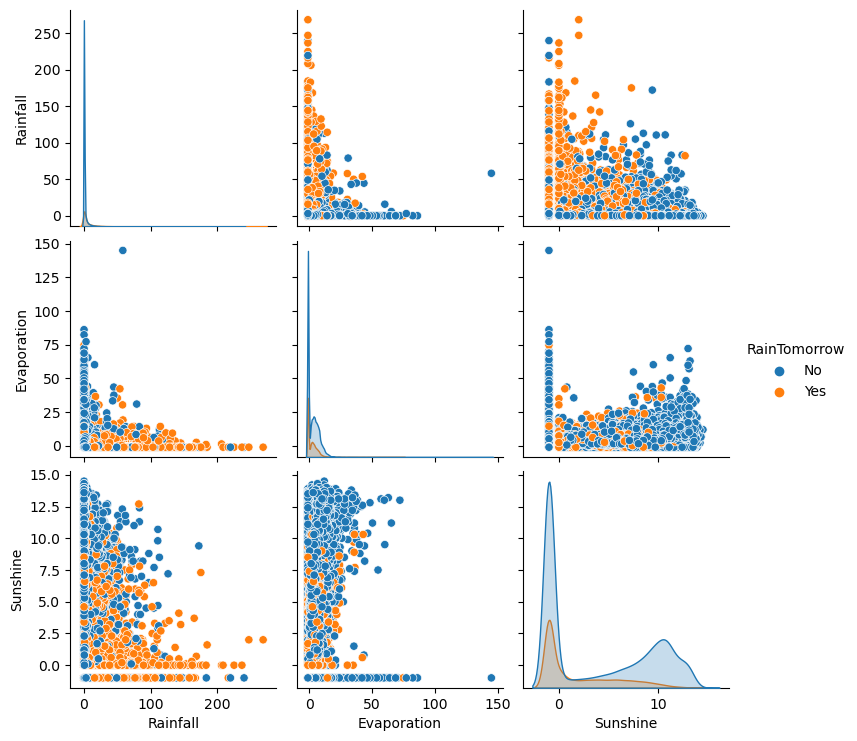

In [9]:
sns.pairplot(data=data[['Rainfall', 'Evaporation', 'Sunshine','RainTomorrow']], hue='RainTomorrow', palette='tab10')
plt.show()

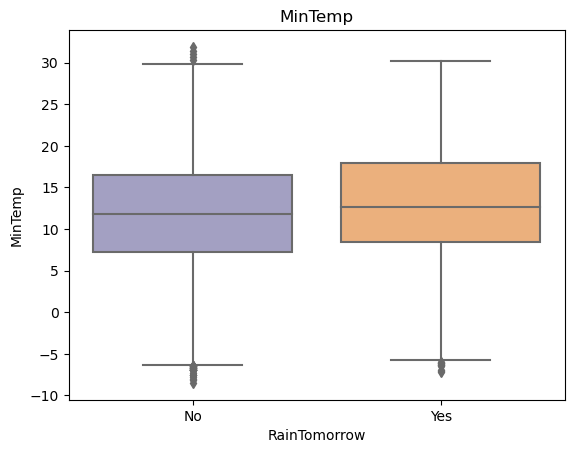

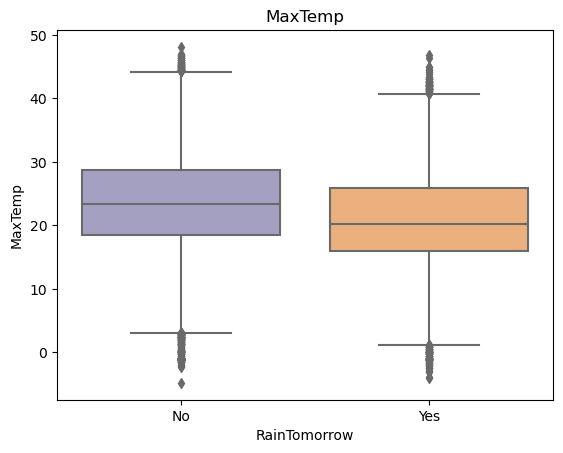

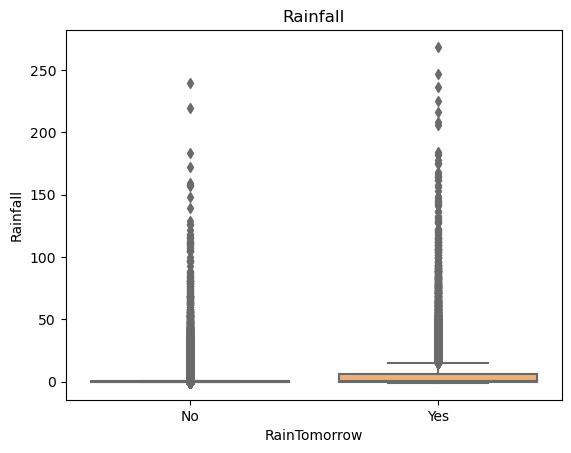

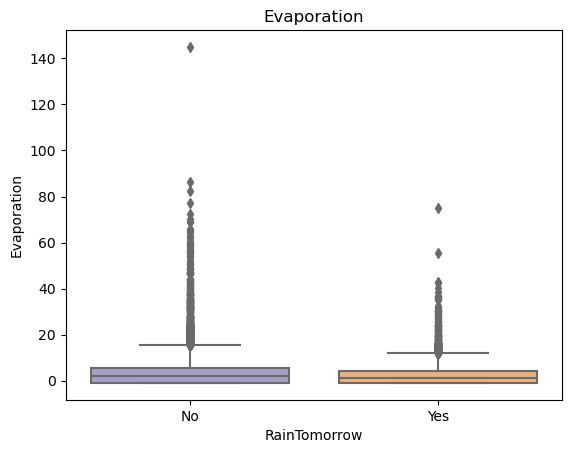

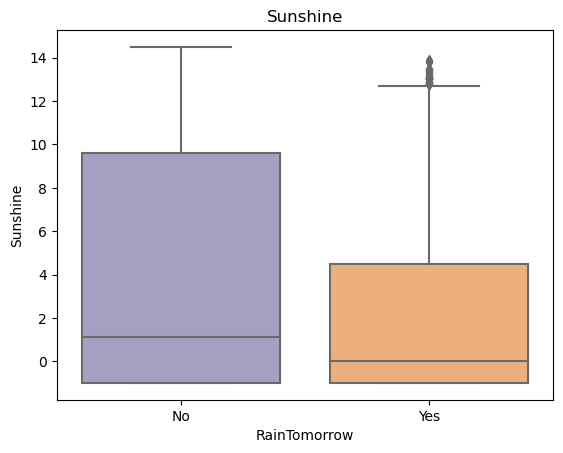

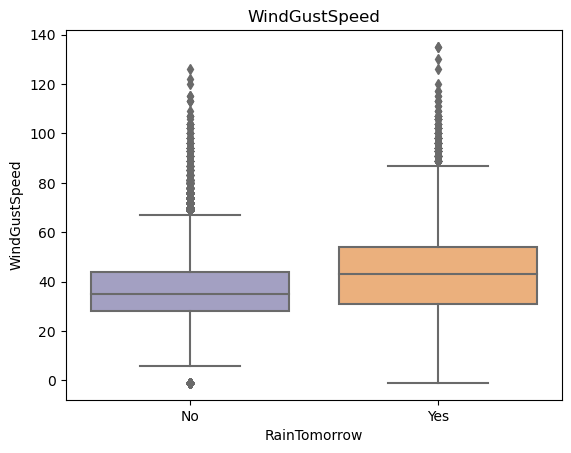

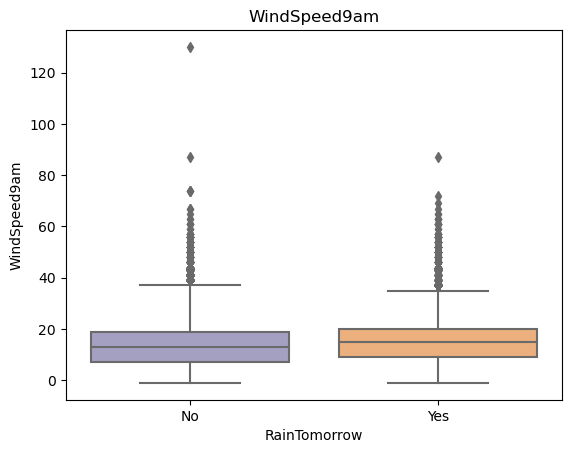

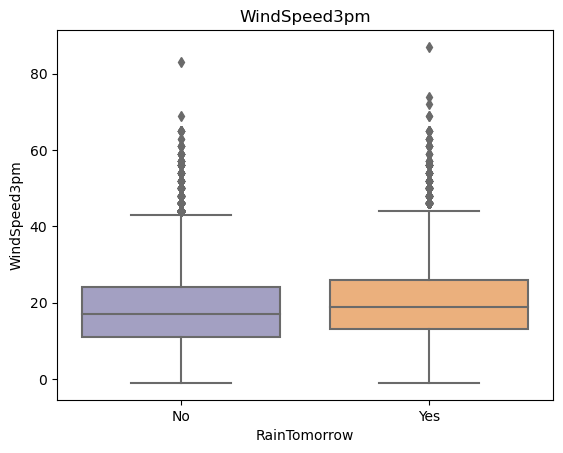

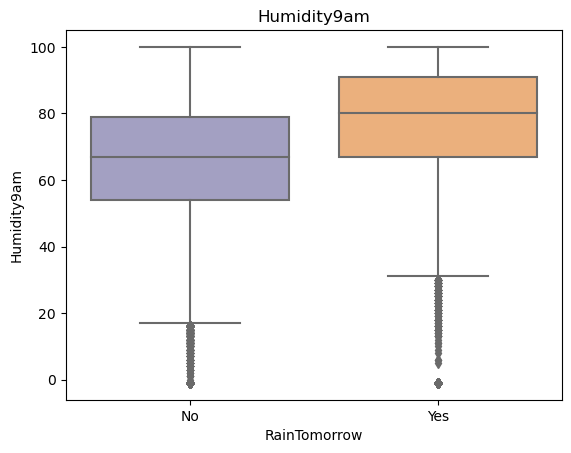

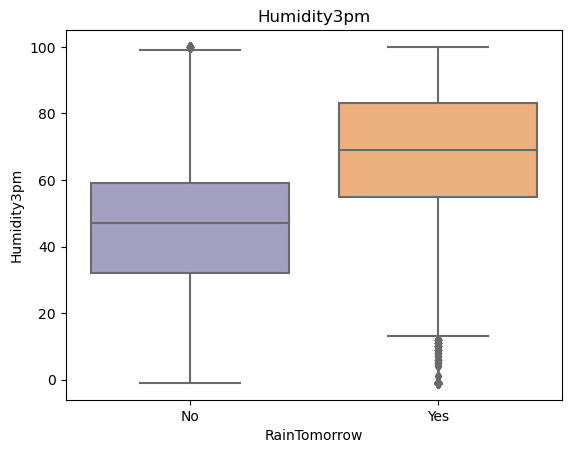

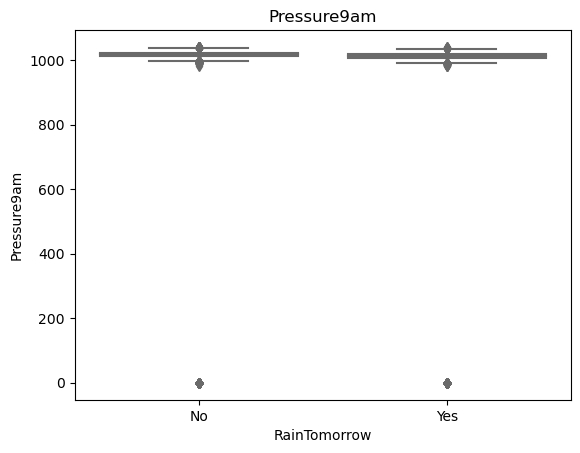

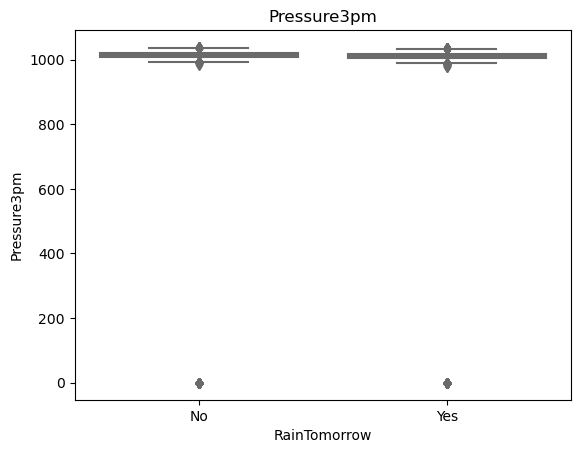

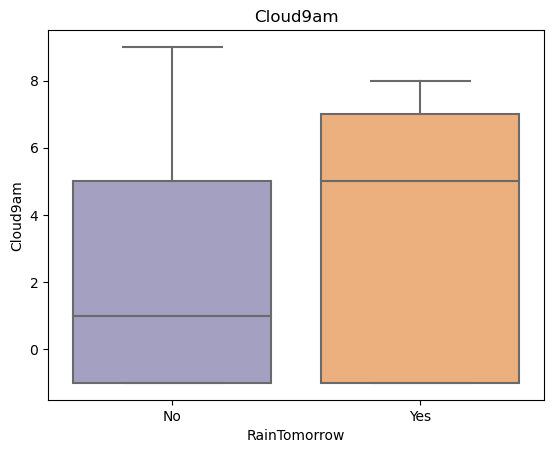

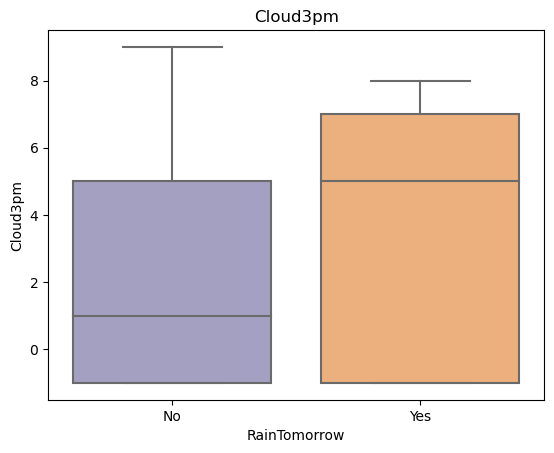

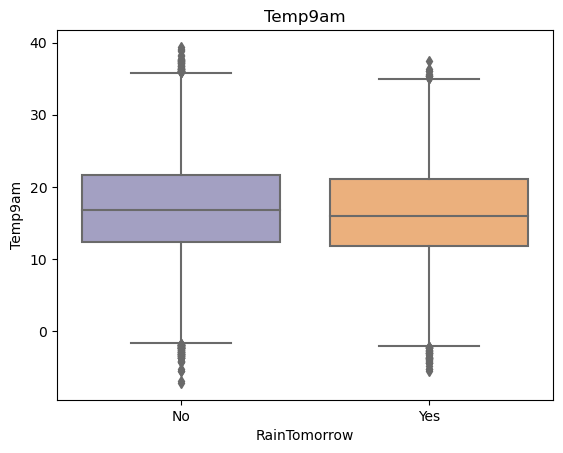

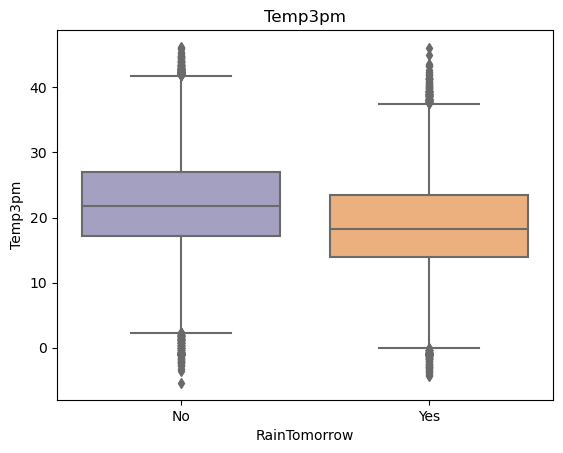

In [10]:
for col in numerical_features:
    if col!='RainTomorrow':
        sns.boxplot(x='RainTomorrow', y=col, data=data, palette='tab20c_r')
        plt.title(col)
        plt.show()

In [11]:
tlog = {}
for i in category_features:
    tlog[i] = data.loc[data['RainTomorrow'] == 'Yes', i].value_counts()
flog = {}
for i in category_features:
    flog[i] = data.loc[data['RainTomorrow'] == 'No', i].value_counts()

Text(0.5, 1.0, 'Not RainTomorrow')

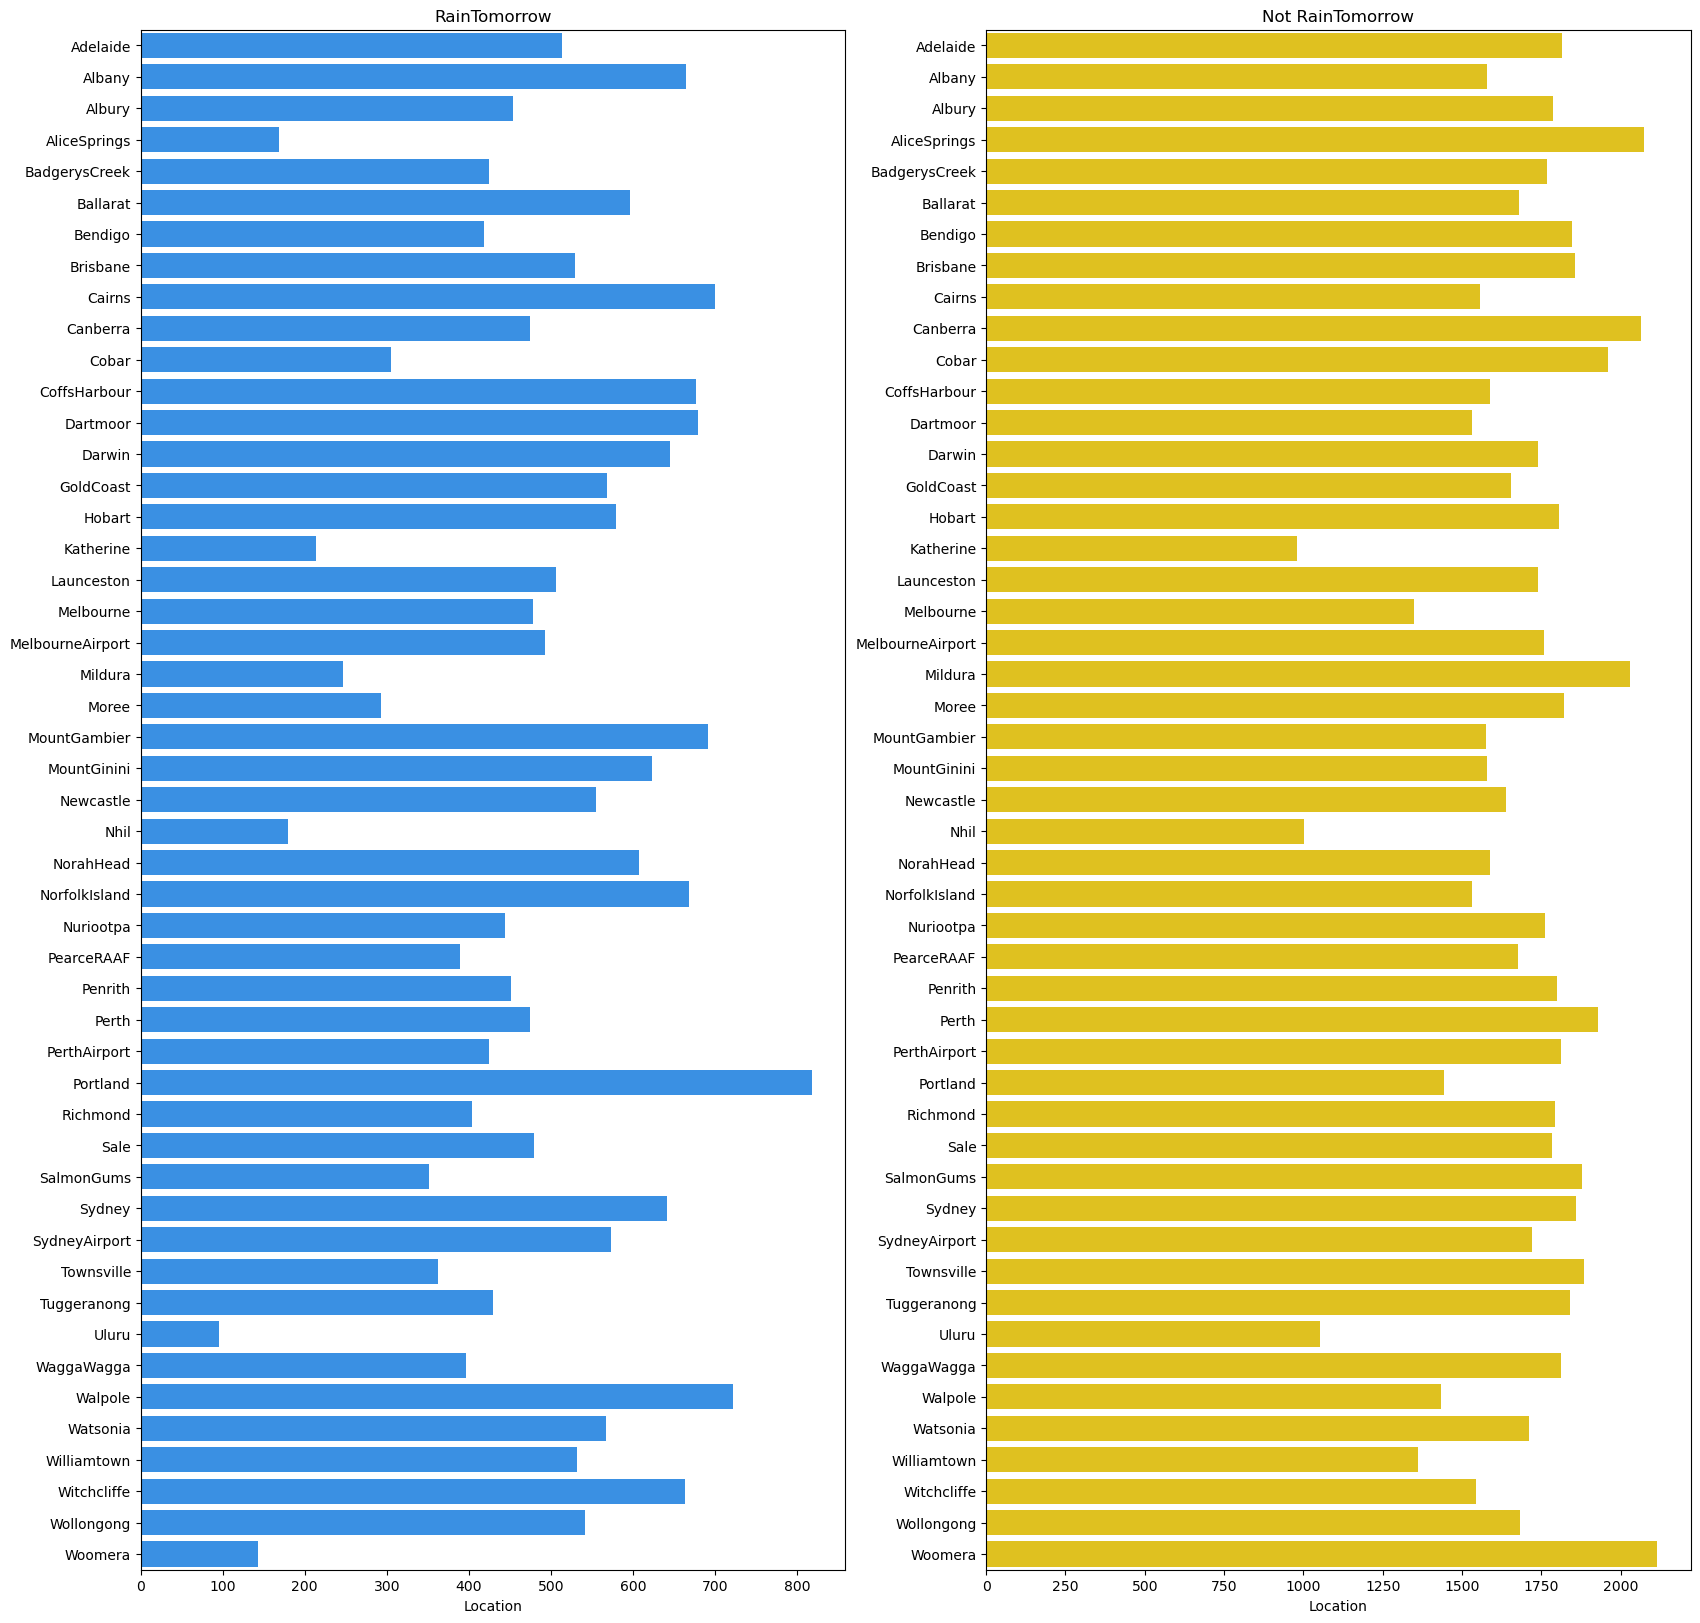

In [12]:
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x=pd.DataFrame(tlog['Location']).sort_index()['Location'], y=pd.DataFrame(tlog['Location']).sort_index().index, color='dodgerblue', ax=ax1)
ax1.set_title('RainTomorrow')

ax2 = plt.subplot(1,2,2)
sns.barplot(x=pd.DataFrame(flog['Location']).sort_index()['Location'], y=pd.DataFrame(flog['Location']).sort_index().index, color='gold', ax=ax2)
ax2.set_title('Not RainTomorrow')


Text(0.5, 1.0, 'Not RainTomorrow')

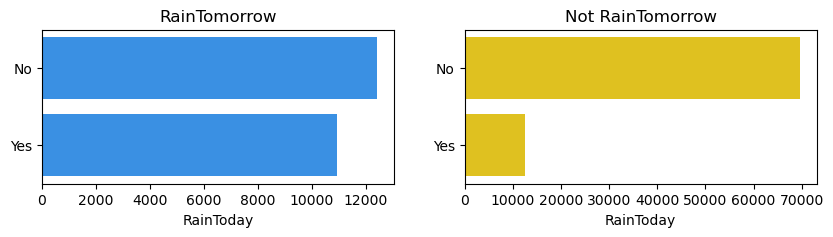

In [13]:
fig = plt.figure(figsize=(10, 2))
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x=pd.DataFrame(tlog['RainToday'][:2]).sort_index()['RainToday'], y=pd.DataFrame(tlog['RainToday'][:2]).sort_index().index, color='dodgerblue', ax=ax1)
ax1.set_title('RainTomorrow')

ax2 = plt.subplot(1,2,2)
sns.barplot(x=pd.DataFrame(flog['RainToday'][:2]).sort_index()['RainToday'], y=pd.DataFrame(flog['RainToday'][:2]).sort_index().index, color='gold', ax=ax2)
ax2.set_title('Not RainTomorrow')

### step5: 对离散变量进行编码

In [14]:
def get_map_function(x: pd.Series):
    mapp = dict(zip(x.unique().tolist(), range(len(x.unique().tolist()))))
    def map_function(y):
        if y in mapp:
            return mapp[y]
        return -1
    return map_function 

In [15]:
for i in category_features+['RainTomorrow']:
    data[i] = data[i].apply(get_map_function(data[i]))

In [16]:
data['Location'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype=int64)

### step6:利用xgboost进行训练与预测

In [17]:
from sklearn.model_selection import train_test_split

data_target_part = data['RainTomorrow']
data_features_part = data[[x for x in data.columns if x != 'RainTomorrow']]

x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size=0.2, random_state=2020)

In [18]:
from xgboost.sklearn import XGBClassifier

clf = XGBClassifier()
clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)


In [20]:
confusion_matrix_result = confusion_matrix(y_test,test_predict)
confusion_matrix_result

array([[15656,   897],
       [ 2142,  2634]], dtype=int64)

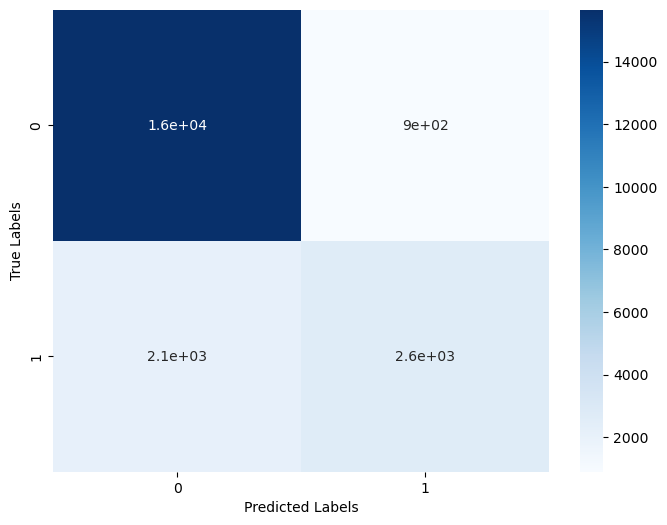

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, cmap='Blues', annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<Axes: >

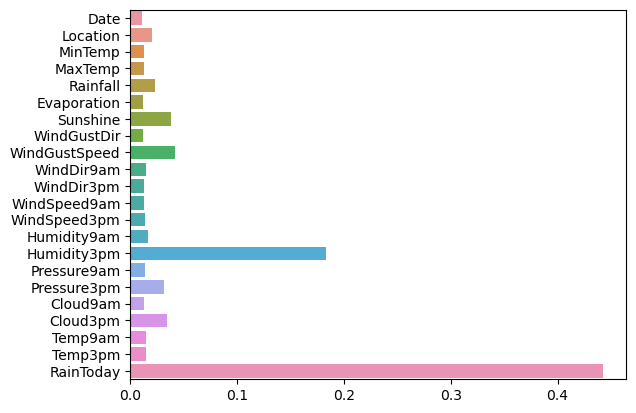

In [22]:
sns.barplot(y=data_features_part.columns, x=clf.feature_importances_ )

In [25]:
from xgboost import plot_importance

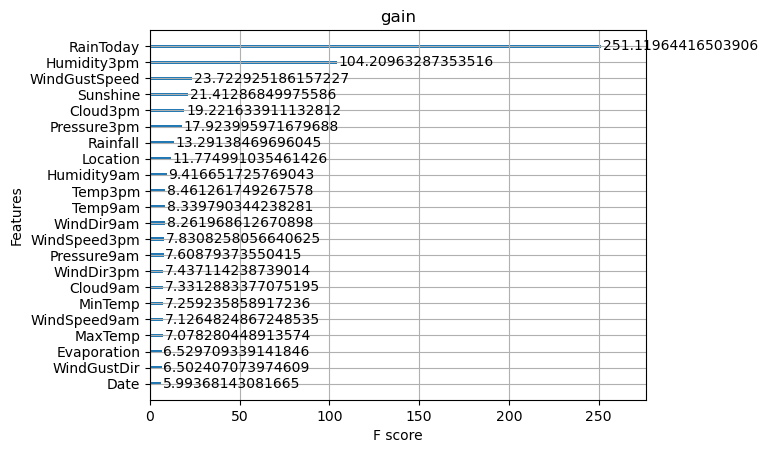

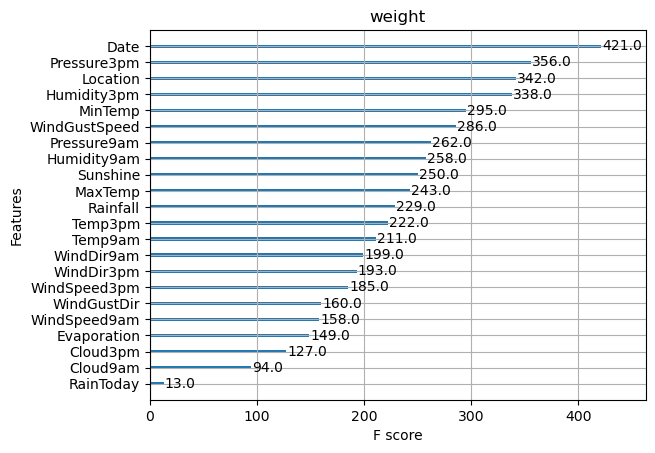

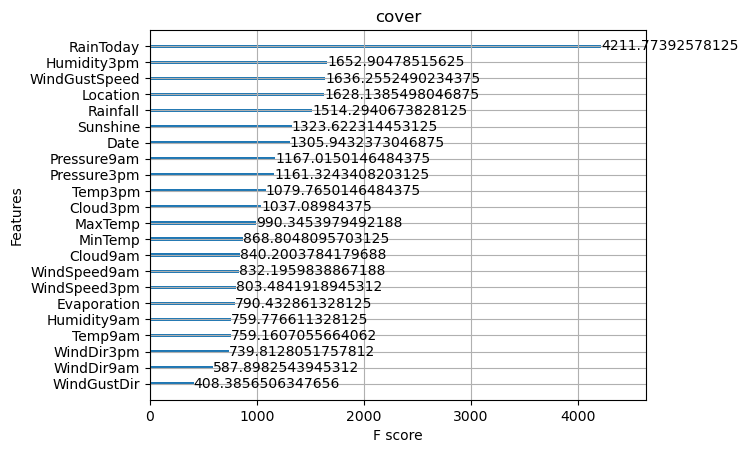

acc = 0.8575179333302076


In [26]:
def estimate(model, data):
    ax1 = plot_importance(model, importance_type='gain')
    ax1.set_title('gain')
    ax2 = plot_importance(model, importance_type='weight')
    ax2.set_title('weight')
    ax3 = plot_importance(model, importance_type='cover')
    ax3.set_title('cover')
    plt.show()

def classes(data, label, test):
    model = XGBClassifier()
    model.fit(data, label)
    ans = model.predict(test)
    estimate(model=model, data=data)
    return ans 

ans = classes(x_train, y_train, x_test)
pre = accuracy_score(y_test, ans)
print('acc =', accuracy_score(y_test, ans))
    

### step8:调参 

In [27]:
from sklearn.model_selection import GridSearchCV

In [29]:
params = {
    'learning_rate': [0.1, 0.3, 0.6],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.6, 0.8],
    'max_depth': [3, 5, 8],
    'n_estimators':[50, 100]
}

model = XGBClassifier()
clf = GridSearchCV(model, params, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
clf.fit(x_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8],
                         'learning_rate': [0.1, 0.3, 0.6],
                         'max_depth': [3, 5, 8], 'n_estimators': [50, 100],
                         'subsample': [0.8, 0.9]},
             scoring='accuracy', verbose=1)

In [32]:
best_params = clf.best_params_

In [39]:
best_clf = XGBClassifier(**best_params)

The accuracy of xgb is 0.8999355330246732
The accuracy of xgb is 0.857705471423883
The confusion matrix of xgb is
 [[15745   808]
 [ 2227  2549]]


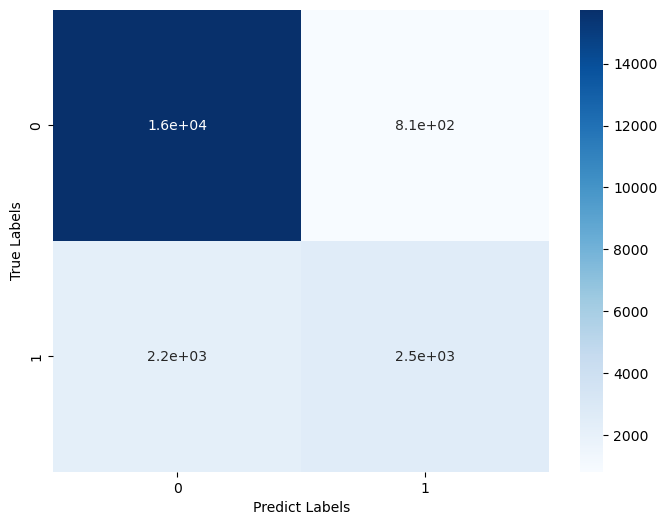

In [44]:
best_clf.fit(x_train, y_train)

train_predict = best_clf.predict(x_train)
test_predict = best_clf.predict(x_test)

print('The accuracy of xgb is', accuracy_score(y_train, train_predict))
print('The accuracy of xgb is', accuracy_score(y_test, test_predict))

confusion_matrix_result = confusion_matrix(y_pred=test_predict, y_true=y_test)
print("The confusion matrix of xgb is\n", confusion_matrix_result)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predict Labels')
plt.ylabel('True Labels')
plt.show()